### Import Libraries:

In [12]:
import pandas as pd # pandas as alies as pd
import numpy as np # numpy as alies as np
import matplotlib.pyplot as plt # matplotlib as alies as plt
import seaborn as sns # seaborn as alies as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Load the database:

In [13]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

### Exploring the database:

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Visualizing  the Distrubution of ratings:

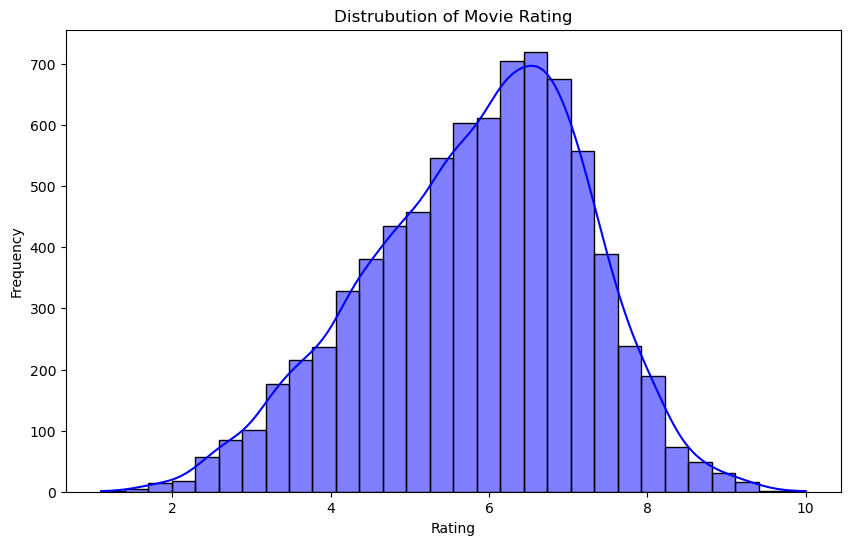

In [22]:
plt.figure (figsize = (10,6))
sns.histplot(df['Rating'],bins = 30, kde = True, color = 'blue')
plt.title('Distrubution of Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Information of data:

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [24]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Handle the null values:

In [25]:
df.dropna(inplace = True)

In [26]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### Data Preprocessing:

In [27]:
le = LabelEncoder()

In [28]:
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])

In [29]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,229,7.0,8,629,1352,2272,319
3,#Yaaram,(2019),110 min,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,(1997),147 min,157,4.7,827,1530,378,75,2045
6,...Yahaan,(2005),142 min,289,7.4,"1,086",2044,692,1112,2524
8,?: A Question Mark,(2012),82 min,320,5.6,326,135,1934,1175,1013


### Features Selection:

In [30]:
features = df[['Genre', 'Director' ,'Actor 1','Actor 2','Actor 3']]

In [31]:
target = df['Rating']

### Split the Data into Training and Testing Sets:

In [32]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2 , random_state =42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.824204245176786


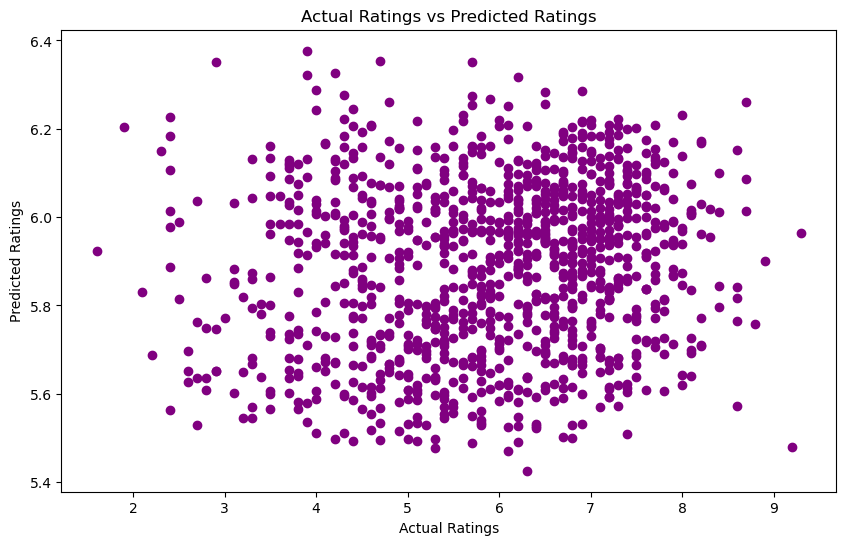

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='purple')
plt.title('Actual Ratings vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()
